In [32]:
import numpy as np
import numpy.linalg as npln
import scipy.linalg as ln
import matplotlib.pyplot as plt
import math

In [33]:
# part of question 3
# computes the matrix vector product of a lower triangualr matrix with only 1 along the main diagonal without
# performing any multiplications by 1 or zero

def GenMatVec(A,x):

    # Insert code to compute the product y of the general matrix A with vector x.
    
    # zero vector with the same shape as x
    y = np.zeros(x.shape)

    # looping over each row in A
    for j in range(x.size):

        # setting jth element of y equal to the product of the first element of the jth row of A with the first element of x 
        y[j] = A[j,0] * x[0]
    
        # looping over all columns in A after the first
        for k in range(1, x.size):
            
            # updating jth element of y by summing the products of kth element in jth row of A with kth element of x
            y[j] = y[j] + x[k]*A[j,k]


    return y   # y = Ax

x = np.array([1,2,3,9,10])
A = np.array([[1,0,0,0,0],
              [2,1,0,0,0],
              [3,1,1,0,0],
              [3,8,7,1,0],
              [5,3,9,9,1]])

b = np.zeros(x.shape)


for i in range(x.size):

    b[i] = b[i] + x[i]
    
    for j in range(i+1, x.size):
        b[j] = b[j] + x[i]*A[j,i]

print(b)
print(A@x)
print(GenMatVec(A,x))


[  1.   4.   8.  49. 129.]
[  1   4   8  49 129]
[  1.   4.   8.  49. 129.]


7
8
9
10
11
12
13
[0.0011124610900878906, 6.0558319091796875e-05, 0.00019788742065429688, 0.0004303455352783203, 0.0013515949249267578, 0.005532741546630859, 0.022608280181884766]


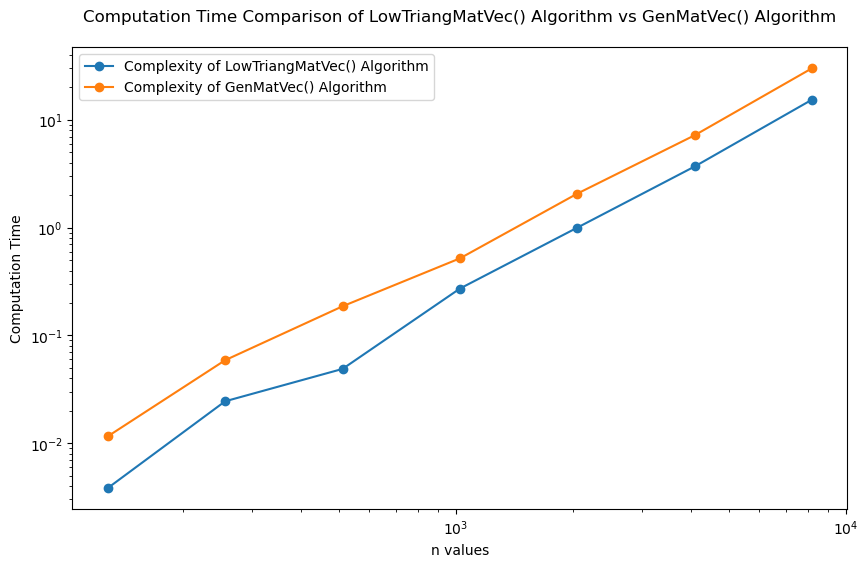

In [42]:
#  Starter code for Question 3 of Assignment 3 
# matrix-vector multiplication analysis

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt   #  for plotting
import time                       #  module for timing computations

from GenMatVecA3 import GenMatVec              # import function for general matrix-vector product
from LowTriangMatVecA3 import LowTriangMatVec  # import function for matrix-vector product with unit lower triangular matrix

wtimes_Low = []        #  initialize list for storing computation times for lower triangular matrix
wtimes_Gen = []        #  initialize list for storing computation times for lower triangular matrix
wtimes_BuiltIn = []    #  initialize list for storing computation times for built-in Python function
nValues = []           #  initialize list for storing n values

for k in range(7,14):     # Loop over matrix sizes
    print(k)                              
    n = 2**k
    nValues.append(n)
    A = np.random.rand(n*n).reshape((n,n))  # Set up random general matrix and right hand side
    P,L,U = scipy.linalg.lu(A)              # use LU decomp to get a unit lower triangular matrix L
    x = np.random.rand(n)                   # Set up random vector

    
    #  compute products and measure computation time for general matrix A and record result
    tb = time.time()
    GenMatVec(A,x)
    ta = time.time()
    tt=ta-tb
    wtimes_Gen.append(tt)

    #  compute products and measure computation time for unit lower triangular matrix L and record result
    tb = time.time()
    LowTriangMatVec(L,x)
    ta = time.time()
    tt=ta-tb
    wtimes_Low.append(tt)

    #  compute products and measure computation time using built-in Python function and record result
    tb = time.time()
    A@x
    ta = time.time()
    tt=ta-tb
    wtimes_BuiltIn.append(tt)

    #  end k for loop


#  print out computation times and plot results

# printing out computation times for builtin algorithm
print(wtimes_BuiltIn)

# Create a figure with 1 subplots
fig, ax = plt.subplots(figsize=(10,6))

# Plotting relative error
ax.loglog(nValues, wtimes_Low, '-o', label='Complexity of LowTriangMatVec() Algorithm')

# Plotting maximal error
ax.loglog(nValues, wtimes_Gen, '-o', label='Complexity of GenMatVec() Algorithm')

# Adding labels and a title
ax.set_xlabel('n values')
ax.set_ylabel('Computation Time')
ax.set_title('Computation Time Comparison of LowTriangMatVec() Algorithm vs GenMatVec() Algorithm\n')
ax.legend()
plt.show()
  


### Question 1

In [ ]:
# Starter code for Python function for finding 
#   Condition number of specified matrix as
#     a function of the parameter a

import numpy as np


def CondNumFunc( a ):

    A = np.array([[1,2,4],[3,a,1],[1,-2,3]])

    return npln.cond(A,2) # Condition Number of specified matrix



In [ ]:
#  Starter code for Question 1 of Assignment 3 

import numpy as np

# Import the function you wrote for part 1(a) and the secant iteration function.
#from CondNumFuncA3 import CondNumFunc
from Secant import secant_method


# Set parameters and initial values for secant iteration.

desired_cond_num = 4

def f(a):
    return CondNumFunc(a) - desired_cond_num

x_previous = 0
x_current = 5
k_max = 100
error_max = 10**(-8)
res_max = 10**(-8)

# Do secant iteration.
solution_secant, record_secant, flag_secant = secant_method( f, x_previous, x_current, k_max, error_max, res_max )


# write out the solution
print(f"The \"a\" value required so that matrix \"A\" has a condition number of {desired_cond_num} is {solution_secant}")


The "a" value required so that matrix "A" has a condition number of 4 is 3.8510040856721295


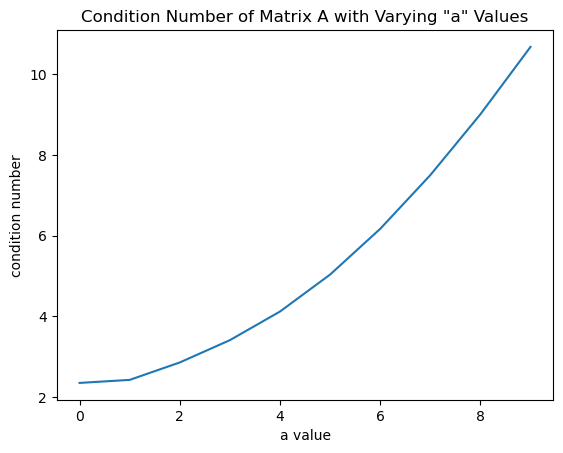

In [ ]:
x = np.arange(0,10)
y = np.zeros(10)

for k in range(x.size):
    y[k] = CondNumFunc(x[k])

plt.plot(x,y)

# Adding labels and a title
plt.xlabel('a value')
plt.ylabel('condition number')
plt.title('Condition Number of Matrix A with Varying \"a\" Values')

plt.show()

### Question 2

In [ ]:
#  solves Ax=b by via the decomposition PA = LU

import numpy as np
import scipy.linalg as ln

def LUPsolve(A,b):  # inputs n x n numpy array A, and n x 1 numpy array b

    # Performing LU-decomposition with partial pivoting on A and returning all relevant matrices
    P,L,U = ln.lu(A)

    # setting P equal to the transpose of itself since ln.lu() returns a transpose of the permutation matrix
    P = P.T

    # here y = Ux and will be evaluated as part of the system Ly=Pb
    y = ln.solve_triangular(L, P@b, lower=True)

    # using the calculated y above we solve for x in the system Ux = y
    x = ln.solve_triangular(U,y,lower=False)
    
    return x, L, U, P  # outputs solution x, and numpy arrays L, U and P from PA = LU decomposition

V = np.vander(np.linspace(-1,1,26))
c = V[:,24]
x_star, L,U,P = LUPsolve(V,c)
x_true = np.identity(26)[:,24]

maximal_error = npln.cond(V)*(ln.norm(c - V@x_star,2)/ln.norm(c,2))
true_error = ln.norm(x_true - x_star,2)/ln.norm(x_true,2)

print("(relative error of x_star) = ", true_error, "<=", maximal_error, " = (maximal relative error of x_star)")



(relative error of x_star) =  2.731258289630759e-07 <= 1.168238332485655e-05  = (maximal relative error of x_star)


41 1.4648836183042544e+17 4.440892098500626e-16


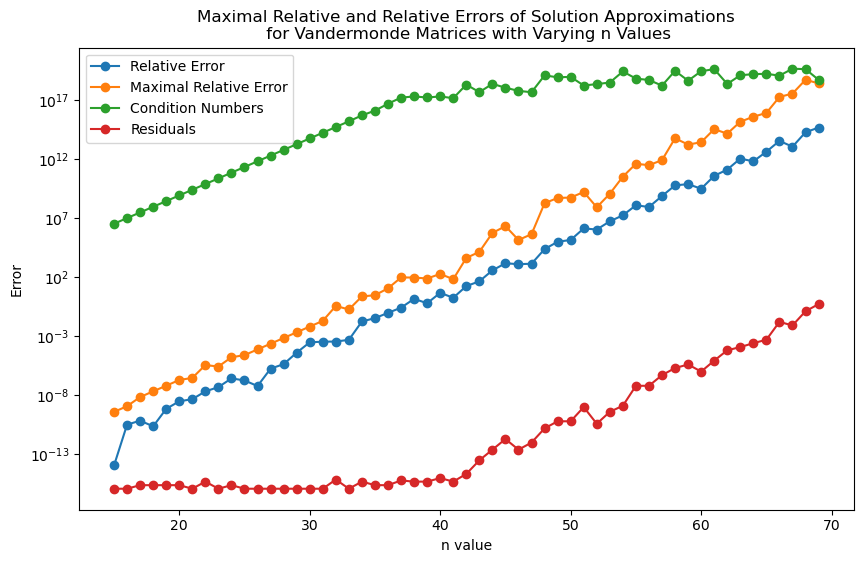

In [ ]:
#  Starter code for Question 2 of Assignment 3 
#  analysis of linear systems involving Vandermonde matrix


import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as ln
import scipy as sc

#  import function you wrote for solving linear systems
from LUPsolveA3 import LUPsolve

# initialize variables
relativeErrorRecord = []
maxErrorRecord = []
nValues = np.arange(15,70)
conditionNumbers = []
residuals = []

# loop over matrix sizes
for N in nValues:
    
   # call vander to get V
   V = np.vander(np.linspace(-1,1,N+1))
   
   # form the vector c (the right hand side of the equation Vx=c)
   c = V[:,N-1]

   # call LUPsolve to get x
   x_star,L,U,P = LUPsolve(V,c)

   # form the true x for current N
   x_true = np.zeros(N+1)
   x_true[-2] = 1

   # compute the error and record
   true_error = ln.norm(x_true - x_star,sc.inf)/ln.norm(x_true,sc.inf)
   relativeErrorRecord.append(true_error)

   # compute the max relative error and record
   maximal_error = np.linalg.cond(V)*(ln.norm(c - V@x_star,sc.inf)/ln.norm(c,sc.inf))
   maxErrorRecord.append(maximal_error)
   residuals.append(ln.norm(c - V@x_star,sc.inf)/ln.norm(c,sc.inf))
   conditionNumbers.append(np.linalg.cond(V))


# plot error and max relative error versus the matrix size on a logarithmic scale on the y-axis (semilogy) 

# Create a figure with 1 subplots
fig, ax = plt.subplots(figsize=(10,6))

# Plotting relative error
ax.semilogy(nValues, relativeErrorRecord, '-o', label='Relative Error')

# Plotting maximal error
ax.semilogy(nValues, maxErrorRecord, '-o', label='Maximal Relative Error')

# Plotting condition numbers
ax.semilogy(nValues, conditionNumbers, '-o', label='Condition Numbers')

# Plotting condition numbers
ax.semilogy(nValues, residuals, '-o', label='Residuals')


# Adding labels and a title
ax.set_xlabel('n value')
ax.set_ylabel('Error')
ax.set_title('Maximal Relative and Relative Errors of Solution Approximations\n for Vandermonde Matrices with Varying n Values')
ax.legend()
print(nValues[26], conditionNumbers[26], residuals[26] )
plt.show()